In [42]:
# Libraries import

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pylab as plt

import seaborn as sns

In [43]:
# Dataset import
dataset = pd.read_csv("Walmart_Store_sales.csv")

# PART 1

# Basic exploration

In [44]:
# Getting number of rows and columns of dataset

dataset.shape

(150, 8)

In [45]:
# Printing first 5 rows of dataset

dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [46]:
# Getting all statistics of dataset

dataset.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [47]:
# Printing more info about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [48]:
#Display the % of missing values in each column of the dataset

dataset.isnull().sum()/dataset.shape[0]

Store           0.000000
Date            0.120000
Weekly_Sales    0.093333
Holiday_Flag    0.080000
Temperature     0.120000
Fuel_Price      0.093333
CPI             0.080000
Unemployment    0.100000
dtype: float64

# EDA

In [49]:
fig1 = px.scatter(dataset, x = 'Temperature' , y = 'Weekly_Sales')
fig1.show()

In [50]:
fig2 = px.scatter(dataset, x = 'Fuel_Price' , y = 'Weekly_Sales')

fig2.show()

In [51]:
fig3 = px.scatter(dataset, x = 'CPI' , y = 'Weekly_Sales')
fig3.show()

In [52]:
fig4 = px.scatter(dataset, x = 'Unemployment' , y = 'Weekly_Sales')
fig4.show()

<AxesSubplot:>

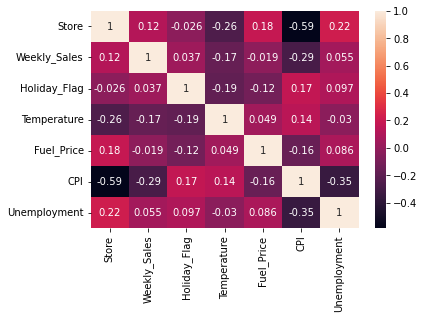

In [53]:
correlation_matrix = dataset.corr()

sns.heatmap(correlation_matrix, annot=True)

We can conclude from the EDA that it didn't helped us much to understand clear correlations between the target variable and the different features.

# Preprocessing with Pandas

Cleaning

In [54]:
dataset.shape

(150, 8)

In [55]:
# Removing rows with missing values from target variable

dataset = dataset.dropna(subset = ["Weekly_Sales"])

In [56]:
# Removing "Date" column from the dataset because we can't use it as it is for the model

dataset = dataset.drop("Date", axis = 1)

In [57]:
dataset.shape

(136, 7)

In [58]:
# Removing outliers from the column "Temperature"

average_temperature = dataset["Temperature"].mean()
standard_deviation_temperature = dataset["Temperature"].std()
temp_to_keep_above = (dataset["Temperature"] > (average_temperature - 3 * standard_deviation_temperature))
temp_to_keep_under = (dataset["Temperature"] < (average_temperature + 3 * standard_deviation_temperature))
dataset = dataset.loc[temp_to_keep_above,:]
dataset = dataset.loc[temp_to_keep_under,:]

In [59]:
# Removing outliers from the column "Fuel Price"

average_fuel_price = dataset["Fuel_Price"].mean()
standard_deviation_fuel_price = dataset["Fuel_Price"].std()
fuel_price_to_keep_above = (dataset["Fuel_Price"] > (average_fuel_price - 3 * standard_deviation_fuel_price))
fuel_price_to_keep_under = (dataset["Fuel_Price"] < (average_fuel_price + 3 * standard_deviation_fuel_price))
dataset = dataset.loc[fuel_price_to_keep_above,:]
dataset = dataset.loc[fuel_price_to_keep_under,:]

In [60]:
# Removing outliers from the column "CPI"

average_cpi = dataset["CPI"].mean()
standard_deviation_cpi = dataset["CPI"].std()
cpi_to_keep_above = (dataset["CPI"] > (average_cpi - 3 * standard_deviation_cpi))
cpi_to_keep_under = (dataset["CPI"] < (average_cpi + 3 * standard_deviation_cpi))
dataset = dataset.loc[cpi_to_keep_above,:]
dataset = dataset.loc[cpi_to_keep_under,:]

In [61]:
# Removing outliers from the column "Unemployment"

average_unemployment = dataset["Unemployment"].mean()
standard_deviation_unemployment = dataset["Unemployment"].std()
unemployment_to_keep_above = (dataset["Unemployment"] > (average_unemployment - 3 * standard_deviation_unemployment))
unemployment_to_keep_under = (dataset["Unemployment"] < (average_unemployment + 3 * standard_deviation_unemployment))
dataset = dataset.loc[unemployment_to_keep_above,:]
dataset = dataset.loc[unemployment_to_keep_under,:]

In [62]:
dataset.shape

(90, 7)

Preprocessing

In [63]:
# Separating target variable Y from features X

print("Separating labels from features...")

feature_list = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target_variable =  'Weekly_Sales'

X = dataset.loc[:,feature_list]
Y = dataset.loc[:,target_variable]
print()
print("...Operation done")

Separating labels from features...

...Operation done


# PART 2

# Preprocessing with Scikit-Learn

In [64]:
# Splitting dataset into train and test set

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [65]:
# Standardizing numerical features at the same scale and encoding categorical features

numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Store', 'Holiday_Flag']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Training Pipeline

In [66]:
# Training of the model on the train set

X_train = feature_encoder.fit_transform(X_train)

print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [67]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print()
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))

Predictions on training set...
...Done.

R2 score on training set :  0.9825478597741769


Test Pipeline

In [68]:
# Training of the model on the test set and predictions

X_test = feature_encoder.transform(X_test)

print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print()
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

Predictions on test set...
...Done.

R2 score on test set :  0.9374740052258973


We are overfitting a bit but in this case it's not significant at all because the model did almost perfect on the training set and the score of the model on the test set is still very high. 
We are going to try to reduce the overfitting by using a regularized linear regression model with Lasso and Ridge.

In [69]:
# Performing a 10 fold cross validation to verify the standard deviation and check if we are really overfitting or not

scores = cross_val_score(regressor, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.9557342562294743
The standard deviation is :  0.026008864353338407


The cross validation confirmed us that we are not overfitting at all because the standard deviation is near 0.

Coefficients

In [70]:
# Checking the coefficients
print('coefficients are ', regressor.coef_)

coefficients are  [-1.00399340e+03 -7.38774741e+04  8.07569257e+05  4.11882275e+04
  2.63751451e+05 -1.25311725e+06  2.45746297e+06 -1.23225266e+06
  6.62994936e+04 -5.92620957e+05 -6.87461942e+05 -1.06755255e+06
  2.01922490e+06  1.38302592e+05  2.29018779e+06  1.05933162e+06
  8.01839642e+05 -5.05348398e+05  1.11742608e+06  1.17883872e+06
  1.51312731e+06  5.92624968e+05 -3.22133315e+04 -5.34132861e+04]


In [71]:
# Creation of a dataframe that takes the coefficients values in correlation with the good feature names
feature_names = feature_encoder.get_feature_names_out()
coeffs = abs(regressor.coef_)

df_coeffs = pd.DataFrame(
    coeffs,
    columns=["Coefficients"],
    index=feature_names,
)

In [72]:
df_coeffs

,Coefficients
num__Temperature,1.003993e+03
num__Fuel_Price,7.387747e+04
num__CPI,8.075693e+05
num__Unemployment,4.118823e+04
cat__Store_2.0,2.637515e+05
cat__Store_3.0,1.253117e+06
cat__Store_4.0,2.457463e+06
cat__Store_5.0,1.232253e+06
cat__Store_6.0,6.629949e+04
cat__Store_7.0,5.926210e+05


In [83]:
fig = px.bar(
    df_coeffs.sort_values(by="Coefficients", ascending= False),
    x ='Coefficients',
    y = df_coeffs.index,
    color = df_coeffs.index,
    title="Coefficients values per feature")

fig.update_layout(
    margin=dict(l=150, r=50, t=50, b=50),

)

fig.show()

The temperature, the fuel price, the CPI and the unemployment are the most important features with the biggest weight. The stores depending on which one have a relatively big weight too. The holiday flag relatively none even if the holiday flag related to special holiday week have a little weight.

# PART 3

# Regularized linear regression model

Ridge

In [74]:
#Creation of the regressor to train a regularized model with Ridge

regressor_ridge = Ridge()
regressor_ridge.fit(X_train, Y_train)

print("Grid search...")

# Grid of values to be tested
params = {
    'alpha': [0, 0.1 , 0.5 , 1] # 0 corresponds to no regularization
}
gridsearch1 = GridSearchCV(regressor_ridge, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch1.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch1.best_params_)
print("Best R2 score : ", gridsearch1.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0}
Best R2 score :  0.9511837158632414


In [75]:
# Predictions on training set, the model have already been trained again on the training set with the grid search



print("Predictions on training set...")
Y_train_pred_grid1 = gridsearch1.predict(X_train)
print("...Done.")
print()
print("R2 score on train set after gridsearch : ", r2_score(Y_train, Y_train_pred_grid1))

Predictions on training set...
...Done.

R2 score on train set after gridsearch :  0.9807381230749712


In [76]:
print("Predictions on test set...")

Y_test_pred_grid1 = gridsearch1.predict(X_test)
print("...Done.")
print()
print("R2 score on test set after gridsearch : ", r2_score(Y_test, Y_test_pred_grid1))

Predictions on test set...
...Done.

R2 score on test set after gridsearch :  0.9421775598568252


We have reduced a bit the overfitting (0,0406 with Ridge and 0,0451 with baseline) and improved the test score compared to the baseline model with no regularization. Let's try now with Lasso if we can do better.

Lasso

In [77]:
#Creation of the regressor to train a regularized model with Lasso

regressor_lasso = Lasso(normalize=True)
regressor_lasso.fit(X_train, Y_train)

print("Grid search...")

# Grid of values to be tested
params = {
    'alpha': [0, 0.1 , 0.5 , 1] # 0 corresponds to no regularization
}
gridsearch2 = GridSearchCV(regressor_lasso, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch2.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch2.best_params_)
print("Best R2 score : ", gridsearch2.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0}
Best R2 score :  0.9543384824001413


In [78]:
# Predictions on training set, the model have already been trained again on the training set with the grid search



print("Predictions on training set...")
Y_train_pred_grid2 = gridsearch2.predict(X_train)
print("...Done.")
print()
print("R2 score on train set after gridsearch : ", r2_score(Y_train, Y_train_pred_grid2))

Predictions on training set...
...Done.

R2 score on train set after gridsearch :  0.9822277767211656


In [79]:
print("Predictions on test set...")

Y_test_pred_grid2 = gridsearch2.predict(X_test)
print("...Done.")
print()
print("R2 score on test set after gridsearch : ", r2_score(Y_test, Y_test_pred_grid2))

Predictions on test set...
...Done.

R2 score on test set after gridsearch :  0.9401919776307769


This time with a Lasso regularization we have a tiny worst overfitting than with a Ridge regularization (0,0421 with Lasso and 0,0406 with Ridge) but it's still better than a baseline model with no regularization at all (0,0421 with Lasso and 0,0451 with baseline)